# COMP 3400 Porject Iteration 1
## New York City Housing Preservtion and Development Data Analysis
For this project, we have chosen two data sets containing information about New York City's affordable housing by building and project. The Department of Housing Preservation and Development (HPD) reports on buildings, units, locations, projects, etc. are present in the dataset which started after January 2014 and are an important part of the dataset. Our goal for this project is that we will predict the affordable buildings or suits in New York City through these data sets. We will also determine which project is responsible for affordable and non-affordable houses in New York City based on different towns. And finally, we will be mapping these based on their latitudes and longitudes on New York City’s map which will declare the most affordable place to live in New York City. 

The datasets that we will be using are - 
1.	Affordable Housing Production by Building
https://data.cityofnewyork.us/Housing-Development/Affordable-Housing-Production-by-Building/hg8x-zxpr
2.	Affordable Housing Production by Project
https://data.cityofnewyork.us/Housing-Development/Affordable-Housing-Production-by-Project/hq68-rnsi
In both of these datasets, all the attributes or columns are common except the ‘Program Group’ which is present in the 2nd data set. We will extract that column from the 2nd dataset as well as drop some less important columns from our 1st dataset and will merge these which will create a new data frame for our project. 

The attributes or columns that we will be using - 

- Building ID - This ID is a unique numeric id assigned by HPD to identify each building.
- Project ID - This ID is a unique numeric id assigned by HPD to identify each project.
- Project Name - This is assigned by HPD as each project’s name.
- Program Group - The groups that are responsible for or to support each project.
- Address - This will determine the actual location of a building in New York City.
- Borough - Towns inside New York City. There are 5 boroughs in these datasets.
- Postcode - Postal code of each building.
- Latitude - Will frame the building’s location on the earth’s surface.
- Longitude - Will frame the building’s location on the earth’s surface.
- Project Start Date - The date on which the project was approved by HPD.
- Very Low Income Units - Affordable rents for households earning 0% - 30% of the area median income*.
- Very Low Income Units - Affordable rents for households earning 31% - 50% of the area median income*.
- Low Income Units - Affordable rents for households earning 51% -80% of the area median income*.
- Moderate Income Units - Affordable rents for households earning 81% - 120% of the area median income*.
- Middle Income Units - Affordable rents for households earning 121% - 165% of the area median income*.
- Studio Units - Units with 0 bedrooms.
- 1-BR Units - Units with only 1 bedroom.
- 2-BR Units - Units with two bedrooms.
- 3-BR+ Units - Units with 3 or more bedrooms.
- Counted Rental Units - Total number of units in a building for which assistance has been provided to landlords in exchange for a requirement for affordable units.
- Counted Homeownership Units - Total number of units in a building for which assistance has been provided straight to the homeowners. 

*Latest Area Median Income table for NYC is available at https://www1.nyc.gov/site/hpd/services-and-information/area-median-income.page


These are the attributes or columns we will be using for our project. 

Our intention with the project is to analyze public policy regarding housing in NYC. Hence we kept attributes that can offer insights into economic situation (such as number of units of different income group, or homeownership vs rental). We also wanted to see if such statistics change between the 5 boroughs of NYC - Manhattan, Brooklyn, Bronx, Staten Island and Queens. Each of these boroughs are popular with a certain demographic - Manhattan being the buisiness district and Queens being popular among the working class. We intend to uncover any difference in public policy within these boroughs.

The Project ID and the Building ID will be kept to identify any buildings or projects by their unique ID for this project. The same goes for the Project Name as well. However, we are keeping the Program Group in our project to understand which government program was used to fund the project. Address and Postcode are necessary for location purposes. Hence, it is necessary for our project. We want to keep the ‘Borough’ column in our work as we will be predicting in which borough/town the rent is more affordable. As we are planning on mapping out the location of each building on New York City’s map, latitude and longitude will determine the location of a building on the map. Extremely low-income units to moderate-income units will be present in our project to get an idea about the availability as well as affordability of rents in New York’s different boroughs. Studio Units to 3-BR+ units to are being kept in our data frame for the availability and affordability of units in New York’s different boroughs. Finally, we will keep Counted Rental and Counted Homeownership units to count the total number of rental units as well as the units that are owned by their owners for our future usage in this project.

### Loading Data

In [1058]:
# import required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from math import floor


#Change pandas default settings so that all columns are displayed in jupyter notebook
pd.set_option('display.max_columns', None)

# Read Affordable_Housing_Production_by_Building.csv.
# Dataset contains information about buildings which were funded by New York City Housing Preservation and Development.
housing_prod_by_building_df = pd.read_csv("Affordable_Housing_Production_by_Building.csv")
print("Loaded", housing_prod_by_building_df.shape[0], "records")
# Display top 10 record
housing_prod_by_building_df.head(10)

Loaded 5798 records


,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,BIN,Community Board,Council District,Census Tract,NTA - Neighborhood Tabulation Area,Latitude,Longitude,Latitude (Internal),Longitude (Internal),Building Completion Date,Reporting Construction Type,Extended Affordability Only,Prevailing Wage Status,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Studio Units,1-BR Units,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
0,65554,BRIDGE ROCKAWAY,03/31/2022,NaN,1003153.0,805,ROCKAWAY AVENUE,Brooklyn,11212.0,3.036030e+09,NaN,BK-16,42.0,916,BK81,40.660120,-73.908285,40.66005,-73.907972,NaN,New Construction,No,Non Prevailing Wage,122,38,13,0,0,0,85,17,46,25,0,0,0,0,173,0,173,174
1,69099,VOA. 1746 ANDREWS AVENUE SOUTH,03/31/2022,NaN,1002488.0,1746,ANDREWS AVENUE SOUTH,Bronx,10453.0,2.028780e+09,NaN,BX-05,14.0,21501,BX36,40.850370,-73.917222,40.85028,-73.916947,NaN,New Construction,No,Prevailing Wage,117,0,0,0,0,1,93,24,1,0,0,0,0,0,118,0,118,118
2,69567,ASLAND CAPITAL. 1940 TURNBULL AVE. PL SARA,03/31/2022,NaN,1003176.0,1940,TURNBULL AVENUE,Bronx,10473.0,2.036720e+09,NaN,BX-09,18.0,16,BX09,40.822911,-73.857365,40.82262,-73.856777,NaN,New Construction,No,Prevailing Wage,153,0,0,0,0,1,122,31,1,0,0,0,0,0,154,0,154,154
3,72295,CONFIDENTIAL,03/31/2022,03/31/2022,NaN,----,----,Bronx,NaN,NaN,NaN,BX-08,11.0,NaN,NaN,NaN,NaN,NaN,NaN,03/31/2022,New Construction,No,Non Prevailing Wage,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
4,72179,CONFIDENTIAL,03/25/2022,03/25/2022,NaN,----,----,Brooklyn,NaN,NaN,NaN,BK-15,46.0,NaN,NaN,NaN,NaN,NaN,NaN,03/25/2022,New Construction,No,Non Prevailing Wage,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
5,72347,CONFIDENTIAL,03/25/2022,03/25/2022,NaN,----,----,Brooklyn,NaN,NaN,NaN,BK-12,40.0,NaN,NaN,NaN,NaN,NaN,NaN,03/25/2022,New Construction,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
6,67442,505 WEST 134 STREET CLUSTER,03/22/2022,NaN,40677.0,505,WEST 134 STREET,Manhattan,10031.0,1.019880e+09,1059763.0,MN-09,7.0,22301,MN06,40.818420,-73.953141,40.81864,-73.953119,NaN,Preservation,No,Non Prevailing Wage,0,11,0,8,0,0,0,0,14,5,0,0,0,0,0,19,19,19
7,67442,505 WEST 134 STREET CLUSTER,03/22/2022,NaN,40693.0,523,WEST 134 STREET,Manhattan,10031.0,1.019880e+09,1059754.0,MN-09,7.0,22301,MN06,40.818868,-73.954214,40.81914,-73.954308,NaN,Preservation,No,Non Prevailing Wage,0,17,0,8,0,0,0,1,16,8,0,0,0,0,0,25,25,25
8,67442,505 WEST 134 STREET CLUSTER,03/22/2022,NaN,40696.0,527,WEST 134 STREET,Manhattan,10031.0,1.019880e+09,1059752.0,MN-09,7.0,22301,MN06,40.818895,-73.954272,40.81927,-73.954611,NaN,Preservation,No,Non Prevailing Wage,0,17,0,8,0,0,0,1,16,8,0,0,0,0,0,25,25,25
9,72154,CONFIDENTIAL,03/21/2022,03/21/2022,NaN,----,----,Brooklyn,NaN,NaN,NaN,BK-14,40.0,NaN,NaN,NaN,NaN,NaN,NaN,03/21/2022,New Construction,No,Non Prevailing Wage,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1


In [1059]:
# Read Affordable_Housing_Production_by_Building.csv
# Dataset contains information about project which were funded by New York City Housing Preservation and Development.
housing_prod_by_project_df = pd.read_csv("Affordable_Housing_Production_by_Project.csv")

#Drop all columns except Project ID and Program Group and display 10 records
housing_prod_by_project_df.drop(housing_prod_by_project_df.columns.difference(['Project ID','Program Group']), axis=1, inplace=True)
print("Loaded", housing_prod_by_project_df.shape[0], "records")
housing_prod_by_project_df.head(10)

Loaded 3185 records


,Project ID,Program Group
0,65554,Multifamily Finance Program
1,69099,Multifamily Finance Program
2,69567,Multifamily Finance Program
3,72295,Homeowner Assistance Program
4,72179,Homeowner Assistance Program
5,72347,Homeowner Assistance Program
6,67442,Multifamily Finance Program
7,72154,Homeowner Assistance Program
8,72165,Homeowner Assistance Program
9,72156,Homeowner Assistance Program


### Merging data set

In [1060]:
# Merge the two datasets using the common column 'Project ID'.
df = pd.merge(housing_prod_by_building_df, housing_prod_by_project_df, on='Project ID')
print("Dataset contains", df.shape[0], "records")
df.head()

Dataset contains 5798 records


,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,BIN,Community Board,Council District,Census Tract,NTA - Neighborhood Tabulation Area,Latitude,Longitude,Latitude (Internal),Longitude (Internal),Building Completion Date,Reporting Construction Type,Extended Affordability Only,Prevailing Wage Status,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Studio Units,1-BR Units,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Program Group
0,65554,BRIDGE ROCKAWAY,03/31/2022,NaN,1003153.0,805,ROCKAWAY AVENUE,Brooklyn,11212.0,3.036030e+09,NaN,BK-16,42.0,916,BK81,40.660120,-73.908285,40.66005,-73.907972,NaN,New Construction,No,Non Prevailing Wage,122,38,13,0,0,0,85,17,46,25,0,0,0,0,173,0,173,174,Multifamily Finance Program
1,69099,VOA. 1746 ANDREWS AVENUE SOUTH,03/31/2022,NaN,1002488.0,1746,ANDREWS AVENUE SOUTH,Bronx,10453.0,2.028780e+09,NaN,BX-05,14.0,21501,BX36,40.850370,-73.917222,40.85028,-73.916947,NaN,New Construction,No,Prevailing Wage,117,0,0,0,0,1,93,24,1,0,0,0,0,0,118,0,118,118,Multifamily Finance Program
2,69567,ASLAND CAPITAL. 1940 TURNBULL AVE. PL SARA,03/31/2022,NaN,1003176.0,1940,TURNBULL AVENUE,Bronx,10473.0,2.036720e+09,NaN,BX-09,18.0,16,BX09,40.822911,-73.857365,40.82262,-73.856777,NaN,New Construction,No,Prevailing Wage,153,0,0,0,0,1,122,31,1,0,0,0,0,0,154,0,154,154,Multifamily Finance Program
3,72295,CONFIDENTIAL,03/31/2022,03/31/2022,NaN,----,----,Bronx,NaN,NaN,NaN,BX-08,11.0,NaN,NaN,NaN,NaN,NaN,NaN,03/31/2022,New Construction,No,Non Prevailing Wage,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,Homeowner Assistance Program
4,72179,CONFIDENTIAL,03/25/2022,03/25/2022,NaN,----,----,Brooklyn,NaN,NaN,NaN,BK-15,46.0,NaN,NaN,NaN,NaN,NaN,NaN,03/25/2022,New Construction,No,Non Prevailing Wage,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,Homeowner Assistance Program


### Removing Confidential records
A unique feature of our dataset is that many records are classified as CONFIDENTIAL by HPD. A record that is CONFIDENTIAL has null values for attributes such as Address, Latitude, Longitude etc. We will be removing these records as many of the information we are interested in are redacted from these records. 

1089 CONFIDENTIAL records were identified and removed, representing 18.79% of total records.

In [1061]:
# Print the number of records which are classified as 'CONFIDENTIAL'
print("Percentage of records with confidential data:", round(df[df['Project Name'] == 'CONFIDENTIAL'].shape[0] / df.shape[0] * 100, 2), "%")

Percentage of records with confidential data: 18.78 %


In [1062]:
# Delete records that are confidential
df = df[df['Project Name'] != 'CONFIDENTIAL']
# Set Building ID as index
df['Building ID'] = df['Building ID'].astype(int)
df.set_index('Building ID', inplace=True)
df.sort_index(inplace=True)
df.head()

,Project ID,Project Name,Project Start Date,Project Completion Date,Number,Street,Borough,Postcode,BBL,BIN,Community Board,Council District,Census Tract,NTA - Neighborhood Tabulation Area,Latitude,Longitude,Latitude (Internal),Longitude (Internal),Building Completion Date,Reporting Construction Type,Extended Affordability Only,Prevailing Wage Status,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Studio Units,1-BR Units,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Program Group
Building ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
375,48646,SKA MARIN. 1918 FIRST AVE. DRAPER HALL,12/24/2014,11/28/2017,1918,1 AVENUE,Manhattan,10029.0,1.016910e+09,1052997.0,MN-11,8.0,162,MN33,40.784985,-73.943444,40.78466,-73.943076,11/28/2017,Preservation,No,Prevailing Wage,202,0,0,0,0,1,2,200,1,0,0,0,0,0,203,0,203,203,Multifamily Finance Program
382,68660,RIVER CROSSING OWNER HDFC.HPO.FY20,10/23/2019,10/23/2019,1952,1 AVENUE,Manhattan,10029.0,1.016940e+09,1083932.0,MN-11,8.0,162,MN33,40.786225,-73.942518,40.78587,-73.941933,10/23/2019,Preservation,Yes,Non Prevailing Wage,0,0,3,177,22,0,8,61,86,38,9,0,0,0,202,0,202,306,Multifamily Finance Program
413,61875,1199 HOUSING CORP.PLP.FY19,06/28/2019,NaN,2070,1 AVENUE,Manhattan,10029.0,1.017010e+09,1083953.0,MN-11,8.0,162,MN33,40.790368,-73.939510,40.79088,-73.937682,NaN,Preservation,No,Non Prevailing Wage,74,352,0,0,0,0,39,155,150,64,18,0,0,0,0,426,426,426,Multifamily Finance Program
452,66805,TRIPLE HDFC.HPO.FY19,09/27/2018,10/11/2019,2232,1 AVENUE,Manhattan,10029.0,1.017080e+09,1079384.0,MN-11,8.0,178,MN34,40.794966,-73.936151,40.79498,-73.935750,10/11/2019,Preservation,No,Non Prevailing Wage,0,0,8,0,0,0,0,0,8,0,0,0,0,0,8,0,8,8,Multifamily Finance Program
482,71849,2269 1ST AVENUE APARTMENTS,10/26/2021,NaN,340,EAST 117 STREET,Manhattan,10035.0,1.016880e+09,NaN,MN-11,8.0,188,MN34,40.797151,-73.936051,40.79665,-73.935441,NaN,New Construction,No,Non Prevailing Wage,0,0,0,0,27,0,7,16,4,0,0,0,0,0,27,0,27,90,Multifamily Incentives Program


### Minor tweaks
We prefer to concatenate 'Number' field and 'Street' field into a single attribute called 'Address'. We also converted 'Project Start Date' into datetime object. Lastly, we noticed that there are very few units with more than 3 bedrooms. Hence we felt it unnecessary to have separate attributes like 3-BR Units, 4-BR Units, 5-BR Units, 6-BR+ Units, and instead chose to club them together into 3-BR+ Units. 


In [1063]:
# Concatenate 'Number' and 'Street' into a single 'Address' column
df["Address"] = df["Number"].astype(str) + " " + df["Street"]

# Type cast string 'Project Start Date' into datetime64 objects
df['Project Start Date'] = df['Project Start Date'].astype('datetime64[ns]')

# Very few buildings contain high number of 3-BR, 4-BR, 5-BR and 6-BR+ units, compared to studio, 1-BR and 2-BR units.
# We are summing all 3-BR, 4-BR, 5-BR and 6-BR+ units attributes into 3-BR+ units
df["3-BR+ Units"] = df["3-BR Units"].astype(int) + df["4-BR Units"].astype(int) + df["5-BR Units"].astype(int) + df["6-BR+ Units"].astype(int)

# Drop columns that are not relevant to our project, or have been converted into a different form, or can be derived from other columns.
# These include 'Number', 'Street', 'Council District', 'Project Completion Date', 'Building Completion Date', 'BBL', 'BIN', 'Community Board', 'Census Tract', 'NTA - Neighborhood Tabulation Area', 'Latitude', 'Longitude', 'Reporting Construction Type', 'Extended Affordability Only', 'Prevailing Wage Status', 'Other Income Units', 'Unknown-BR Units', 'All Counted Units', 'Total Units'
df = df.drop(columns=['Number', 'Street', 'Council District', 'Project Completion Date', 'Building Completion Date', 'BBL', 'BIN', 'Community Board', 'Census Tract', 'NTA - Neighborhood Tabulation Area', 'Latitude', 'Longitude', 'Reporting Construction Type', 'Extended Affordability Only', 'Prevailing Wage Status', 'Other Income Units', 'Unknown-BR Units', 'All Counted Units', 'Total Units'], errors='ignore')

# Rename Latitude (Internal) to Latitude, Longitude (Internal) to Longitude
df = df.rename(columns={'Latitude (Internal)': 'Latitude', 'Longitude (Internal)': 'Longitude'})
df = df[['Project ID', 'Project Name', 'Program Group', 'Address',  'Borough', 'Postcode', 'Latitude', 'Longitude','Project Start Date', 'Extremely Low Income Units', 'Very Low Income Units', 'Low Income Units', 'Moderate Income Units', 'Middle Income Units', 'Studio Units', '1-BR Units', '2-BR Units', '3-BR+ Units', 'Counted Rental Units', 'Counted Homeownership Units']]



### Handling columns with null values
We have very few records that have missing values, mostly geographical information. In a later stage, we will look into the possibility of using Google Geocoding API to obtain these values from the building's address. At this stage of iteration 1, we chose to drop records with null values.

177 such records were identified, and removed.

Total number of removed records: 1089 + 177 = 1266 (21.8% of all records)

In [1064]:
# Display the number of rows which has a null value for each column
df.isna().sum()

Project ID                       0
Project Name                     0
Program Group                    0
Address                          0
Borough                          0
Postcode                        67
Latitude                       164
Longitude                      164
Project Start Date               0
Extremely Low Income Units       0
Very Low Income Units            0
Low Income Units                 0
Moderate Income Units            0
Middle Income Units              0
Studio Units                     0
1-BR Units                       0
2-BR Units                       0
3-BR+ Units                      0
Counted Rental Units             0
Counted Homeownership Units      0
dtype: int64

In [1065]:
# Drop records with null value in Latitude, Longitude and Postcode
# From the documentation for the dataset, these columns likely have null values because Geocoding API couldn't figure out Latitude, Longitude and Postcode for the address.
df = df[df['Latitude'].notna()]
df = df[df['Longitude'].notna()]
df = df[df['Postcode'].notna()]

# Display the number of rows which has a null value for each column.
df.isna().sum()

Project ID                     0
Project Name                   0
Program Group                  0
Address                        0
Borough                        0
Postcode                       0
Latitude                       0
Longitude                      0
Project Start Date             0
Extremely Low Income Units     0
Very Low Income Units          0
Low Income Units               0
Moderate Income Units          0
Middle Income Units            0
Studio Units                   0
1-BR Units                     0
2-BR Units                     0
3-BR+ Units                    0
Counted Rental Units           0
Counted Homeownership Units    0
dtype: int64

In [1066]:
print("Cleaned data contains", df.shape[0], "rows and", df.shape[1], "columns")

Cleaned data contains 4532 rows and 20 columns


### Descriptor Statistics

In [1067]:
df[['Latitude', 'Longitude', 'Extremely Low Income Units', 'Very Low Income Units', 'Low Income Units', 'Moderate Income Units', 'Middle Income Units', 'Studio Units', '1-BR Units', '2-BR Units', '3-BR+ Units', 'Counted Rental Units', 'Counted Homeownership Units']].describe()

,Latitude,Longitude,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Studio Units,1-BR Units,2-BR Units,3-BR+ Units,Counted Rental Units,Counted Homeownership Units
count,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000
mean,40.743496,-73.919558,6.875331,13.050309,15.035746,2.454987,4.311121,6.029126,14.930715,14.490953,5.855031,30.729700,11.185349
std,0.079545,0.053657,24.573531,39.493842,35.270435,14.563962,21.296912,20.306818,29.035607,28.432361,14.881447,56.689173,50.952781
min,40.573710,-74.170235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.676617,-73.950733,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,40.720755,-73.927726,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,9.000000,0.000000
75%,40.819500,-73.892991,1.000000,6.000000,12.000000,0.000000,1.000000,2.000000,14.000000,13.000000,5.000000,30.000000,0.000000
max,40.905210,-73.729709,429.000000,396.000000,536.000000,358.000000,448.000000,415.000000,241.000000,305.000000,230.000000,542.000000,489.000000


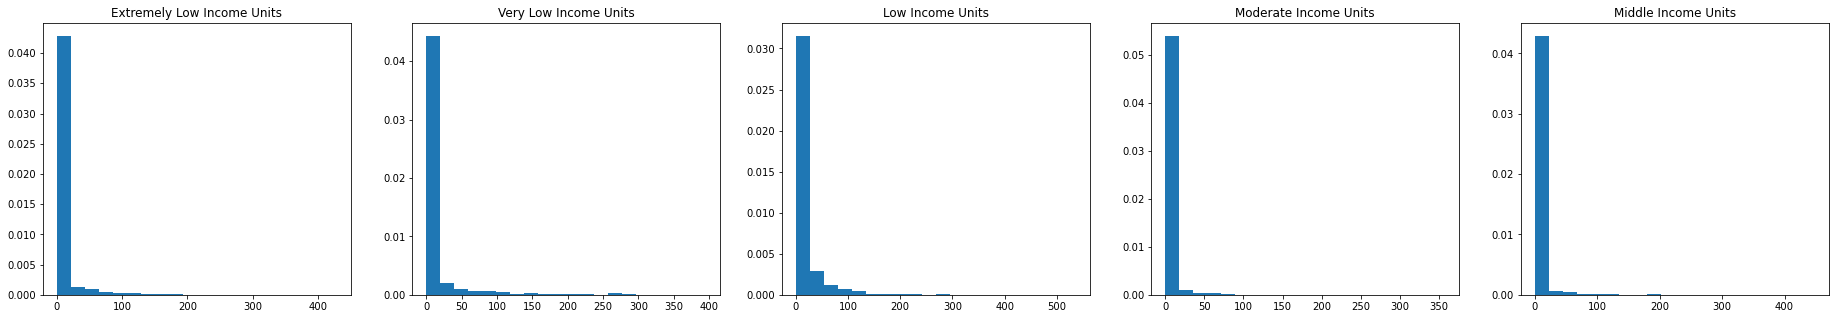

In [1068]:
fig, axs = plt.subplots(1, 5, figsize=(32, 5))

income_groups=['Extremely Low Income Units', 'Very Low Income Units', 'Low Income Units', 'Moderate Income Units', 'Middle Income Units']
for i in range(0, len(income_groups)):
    axs[i].hist(df[income_groups[i]], density=True, bins=20)
    axs[i].set_title(income_groups[i]);


From the histograms, it can be inferred that the data for number of units allocated to different income groups is highly skewed to the left. 

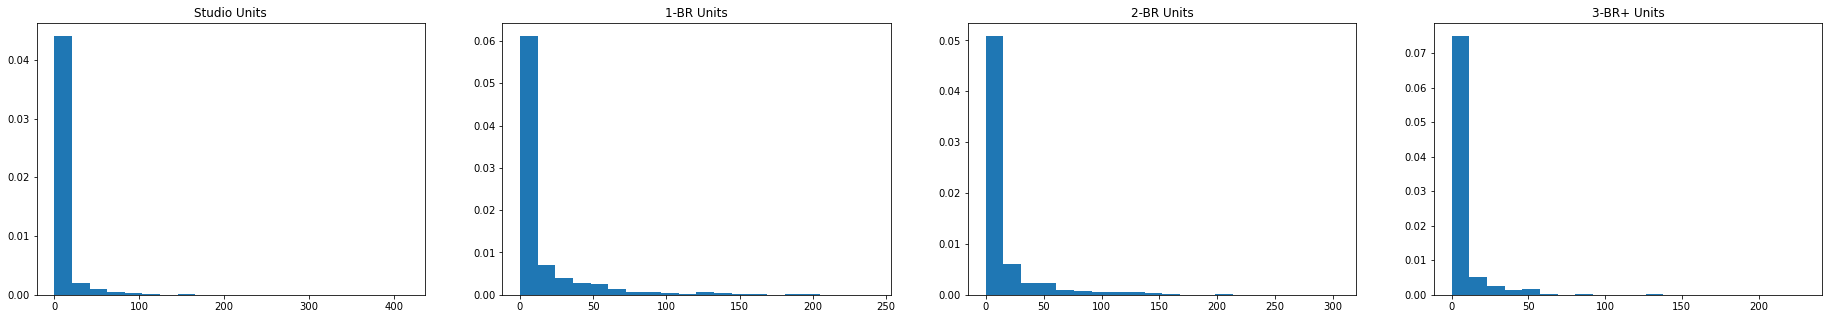

In [1069]:
fig, axs = plt.subplots(1, 4, figsize=(32, 5))

bedroom_units=['Studio Units', '1-BR Units', '2-BR Units', '3-BR+ Units']
for i in range(0, len(bedroom_units)):
    axs[i].hist(df[bedroom_units[i]], density=True, bins=20)
    axs[i].set_title(bedroom_units[i]);

From the histograms, it can be inferred that the data for number of units by the number of bedrooms is highly skewed to the left.

## Plotting

#### Stacked bar plot to illustrate number of units allocated to different income groups in each of NYC's 5 Boroughs
We decided to plot the number of housing units allocated to each income group ('Extremely Low Income Units', 'Very Low Income Units', 'Low Income Units', 'Moderate Income Units', 'Middle Income Units'), grouped by the borough in which the units are located. We chose these attributes since it will offer insights into the income demographics in each of NYC's 5 boroughs. We also felt it was necessary to plot the same information, but with each income group unit represented as a ratio of all units in that borough. We did so because different boroughs have different number of units. By comparing percentages, we were able hedge out statistics against a common scale to see how housing units in NYC boroughs are allocated to different income groups.

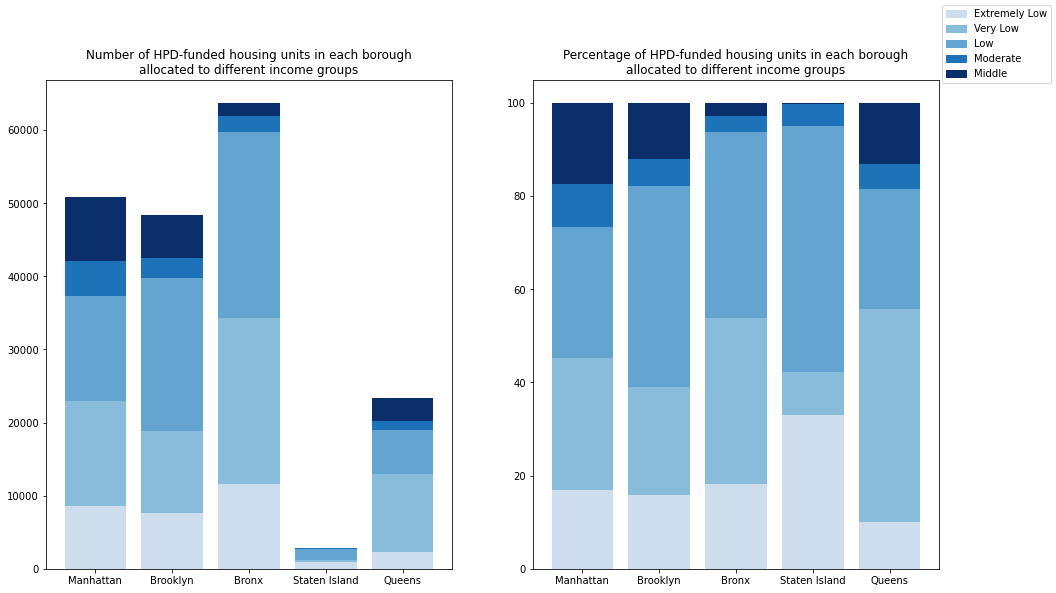

In [1070]:
# Plotting bar charts to illustrate the distribution of units belonging to different income groups in each NYC borough (in absoluet numbers and as ratio)

# array with all possible boroughs
boroughs = ['Manhattan', 'Brooklyn', 'Bronx', 'Staten Island', 'Queens']
# array with all possible income group
income_groups=['Extremely Low Income Units', 'Very Low Income Units', 'Low Income Units', 'Moderate Income Units', 'Middle Income Units']

# Generating a 2D array, where columns are boroughs, and rows are sum of number of units. eg. Row(0,0) will contain number of Extremely Low Income Units in Manhattan
income_groups_absolute = []
# Loop through all income groups
for income_group in income_groups: 
    temp = []
    # Loop through all boroughs
    for borough in boroughs:
        # Perform a sum of all units that are of selected income group in seleted borough
        temp.append(df[df['Borough'] == borough][income_group].sum())
    income_groups_absolute.append(temp)


total_num_units_per_borough = [0, 0, 0, 0, 0]
for income_group in income_groups_absolute:
    for i in range(0, len(income_group)):
        total_num_units_per_borough[i] += income_group[i]

# Generating a 2D array, where columns are boroughs, and rows are ratio of a particular income group unit as a proportion of whole. 
# eg. Row(0,0) will contain ratio of Extremely Low Income Units in Manhattan as a ratio of all units in Manhattan
income_groups_ratio = []
# Loop through range(0, 1, 2.. len(income_group))
for i in range(0, len(income_group)):
    temp = []
    # Loop through range(0, 1, 2.. len(total_num_units_per_borough))
    for j in range(0, len(total_num_units_per_borough)):
        # Perform a division of the number of units of selected income group in selected borough by total number of units in that borough * 100
        temp.append(income_groups_absolute[i][j]/total_num_units_per_borough[j]*100)
    income_groups_ratio.append(temp)


fig, axs = plt.subplots(1, 2, figsize=(16, 9))
axs=axs.flatten() 

colors = {'Extremely Low':'#cddded', 'Very Low': '#89bcdb', 'Low': '#63a4d1', 'Moderate': '#1d72b8', 'Middle': '#0a2f6b'} # Dictionary to assign hex color to different income group

# Function to plot absolute number of units in each borough by income group
def plot_num_units_per_borough_per_income_group(axs):
    bottom = [0, 0, 0, 0, 0] # Array to track height of previous bars
    for i in range(0, len(income_groups_absolute)):
        axs.bar(boroughs, income_groups_absolute[i], bottom=bottom, color=[x for x in colors.values()][i])
        for j in range(0, len(income_groups_absolute[i])):
            bottom[j]+=income_groups_absolute[i][j]
    axs.set_title('Number of HPD-funded housing units in each borough\nallocated to different income groups')

# Function to plot ratio of units in each borough by income group
def plot_ratio_units_per_borough_per_income_group(axs):
    bottom = [0, 0, 0, 0, 0] # Array to track height of previous bars
    for i in range(0, len(income_groups_absolute)):
        axs.bar(boroughs, income_groups_ratio[i], bottom=bottom, color=[x for x in colors.values()][i])
        for j in range(0, len(income_groups_absolute[i])):
            bottom[j]+=income_groups_ratio[i][j]
    axs.set_title('Percentage of HPD-funded housing units in each borough\nallocated to different income groups')

plot_num_units_per_borough_per_income_group(axs[0])
plot_ratio_units_per_borough_per_income_group(axs[1])

# Creating labels
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
fig.legend(handles, labels)

#### Line Chart to illustrate number of units allocated to different income groups by year
We also wanted to see how public policy and construction of new housing units have changed with time. We decided to use 'Project Start date' instead of 'Project Completion Date' since the latter has many null values (for projects that are currently in construction). We decided to just use the year in which the project was approved to get a higher level insight into the number of hosuing units that were built for each income group.

*The data for 2022 only includes the first 4 month of the year 

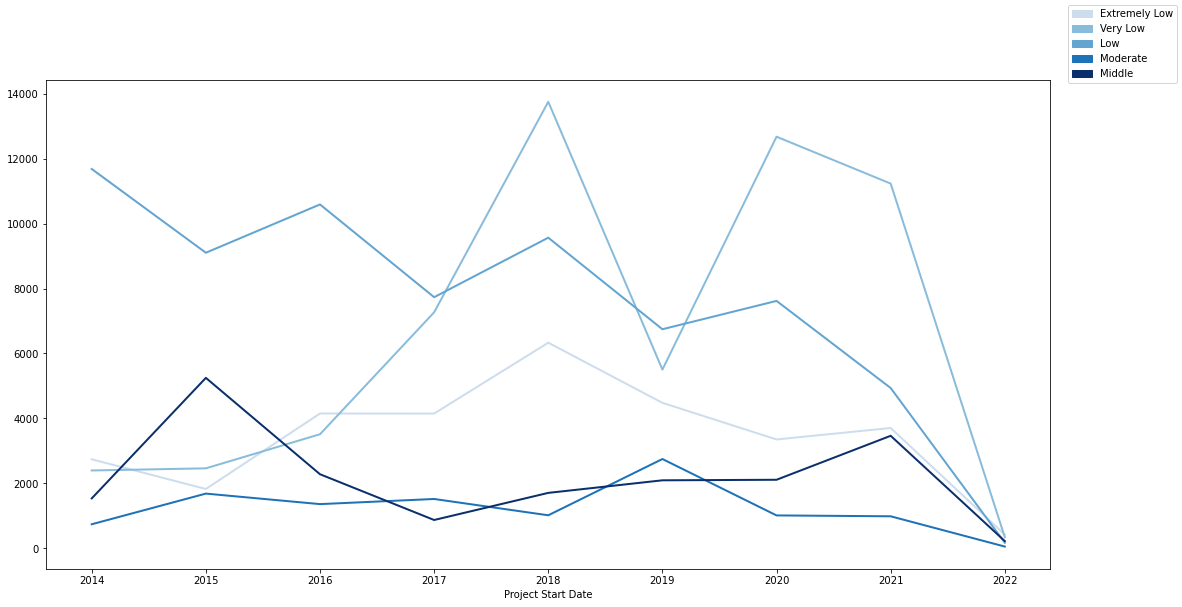

In [1071]:
# Plotting the number of new units of different income groups in each year, from 2014 to 2022
fig, axs = plt.subplots(1,1,figsize=(18,9))


income_groups=['Extremely Low Income Units', 'Very Low Income Units', 'Low Income Units', 'Moderate Income Units', 'Middle Income Units'] # array with all possible income group
colors = {'Extremely Low':'#cddded', 'Very Low': '#89bcdb', 'Low': '#63a4d1', 'Moderate': '#1d72b8', 'Middle': '#0a2f6b'} # Dictionary to assign hex color to different income group

# Function to plot number of units of each income group per year
def plot_num_unit_per_income_group_per_year():
    # Loop from (0, 1, .. len(income_groups)) to select an income group
    for i in range(0, len(income_groups)):
        # Group data by the year obtained from 'Project Start Date', and then perform sum of units of selected income group in that year
        data = df.groupby(df['Project Start Date'].map(lambda x: x.year), )[income_groups[i]].sum()
        data.plot(ax=axs, lw=2, color=[x for x in colors.values()][i])

# Plot legend
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
fig.legend(handles, labels)

plot_num_unit_per_income_group_per_year()
    

### Outlier Detection and resolution

We defined an outlier as any datapoint that was 6 standard deviations above the mean of the series (or below 0, even though we did not have any such record). After repeated trial and error using different outlier detection techniques, we found this technique the best. The reason we went with 6 standard deviation was because our datapoints for 'Extremely Low Income Units', 'Very Low Income Units', 'Low Income Units', 'Moderate Income Units', 'Middle Income Units', 'Studio Units', '1-BR Units', '2-BR Units', '3-BR+ Units' were highly skewed to the left. This was mainly because buildings that have a certain type of unit tends to have a lot of such unit. Eg. if a building contains studio and 1 bedroom units, it will likely contain many studio and 1-BR units, and none of the rest (akin to real world where building floor plans are designed for just one or two types of units). Similary, buildings indtended for extremely low income groups will likely not contain any units intended for middle income units.

We went with the number 6 based the number of records that were reported as outliers. by using 5 standard deviations, we ideentified 5% of records as outliers.

Outliers were replaced with upper bound (ie, mean + 6*sd)

In [1072]:
# Function to plot two line charts to illustrate change in data 
def plot_series_side_by_side(original, modified, columns):
    fig, axs = plt.subplots(len(columns),1,figsize=(16,18))
    axs = axs.flatten()
    i = 0
    for c in columns:
        # Plot original data series
        axs[i].plot(df.index, original[c], label="original", color='black')
        # Plot updated data series
        axs[i].plot(df.index, modified[c], label="modified", color='red')
        # Set title as the selected column
        axs[i].set_title(c)
        axs[i].legend()
        i+=1

Fixed 225 records 5.0 % of records


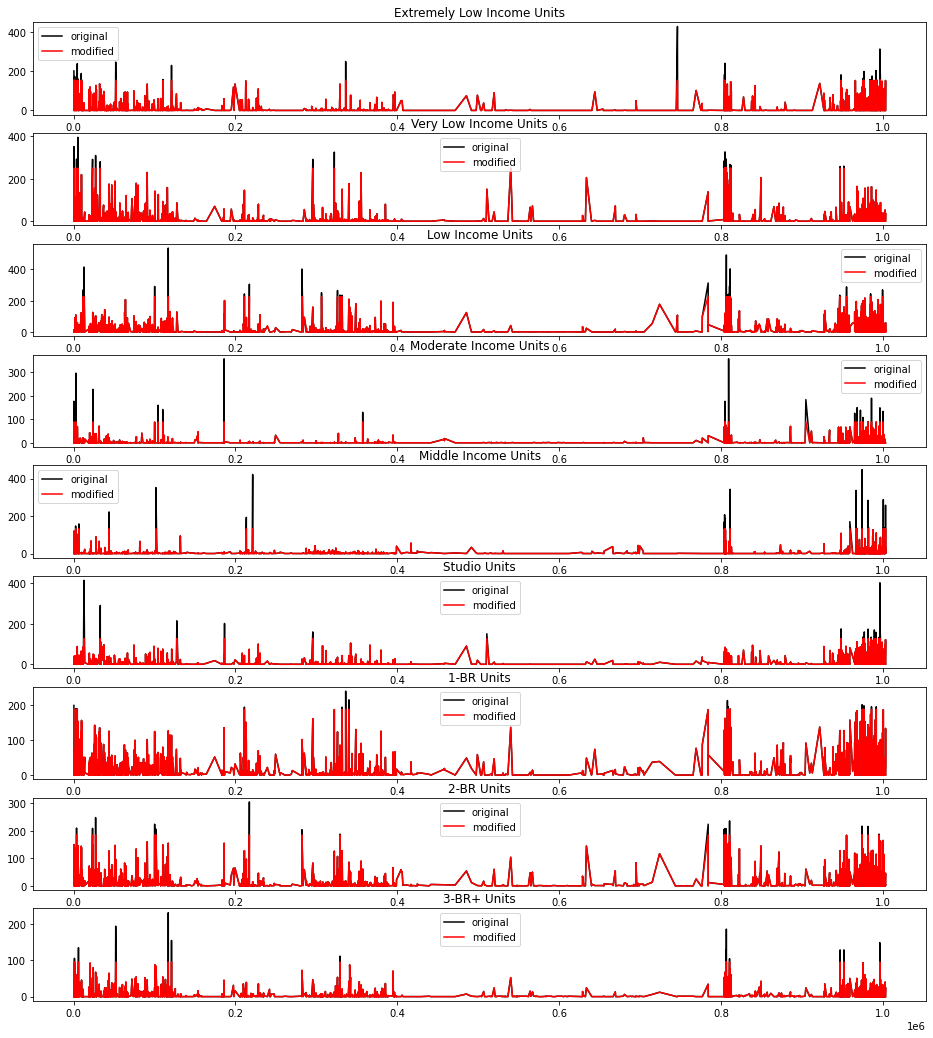

In [1073]:

# All numerical columns, that could possibly have outliers
numeric_cols = ['Extremely Low Income Units', 'Very Low Income Units', 'Low Income Units', 'Moderate Income Units', 'Middle Income Units', 'Studio Units', '1-BR Units', '2-BR Units', '3-BR+ Units']

# Function to find outliers (an oputlier is a datapoint that is 3 standard deviations or more away from mean)
# and then replace those values by the maximum or minimum permissible value
def replace_outliers_5times_std(df, cols):
    count_fixed = 0 # variable to count number of fixed records
    for col in cols:
        upper_bound = df[col].mean() + 6*df[col].std()
        lower_bound = 0

        count_fixed += df[df[col] >= upper_bound][col].count()
        df[col] = np.where(df[col] >= upper_bound, floor(upper_bound), np.where(df[col] <= lower_bound, floor(lower_bound), df[col]))
    print("Fixed", count_fixed, "records", round(count_fixed/df.shape[0]*100, 0), "% of records")
    return df
        
df_before = df.copy()
df = replace_outliers_5times_std(df, numeric_cols)

plot_series_side_by_side(df_before, df, numeric_cols)